# Importing libraries

In [1]:
import sqlite3
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Making the Database

In this section, we'll walk through the process of creating an SQLite database from CSV data. Our data is initially in CSV format, and we want to organize it into a structured database to facilitate data analysis. This approach is particularly useful for smaller projects like this one.

## Checking and Creating the Database

Before creating the database, we need to ensure that it doesn't already exist. If it does, we'll delete it to start fresh. This step helps prevent any conflicts or errors that might arise from overwriting an existing database.

## Populating the Database

Now that we have a fresh database, we'll populate it with data from the provided CSV file. The CSV file, obtained from [Kaggle](https://www.kaggle.com/datasets/holmjason2/videogamedata), contains information about video game sales and reviews. The CSV data is encoded in 'ISO-8859-1' format, so we'll carefully handle encoding issues while reading it.


In [2]:

# Delete the existing database if it exists
if os.path.exists('gamesData.db'):
    os.remove('gamesData.db')

import pandas as pd
import sqlite3

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('game_sales_data.csv')

# Create a SQLite database connection
conn = sqlite3.connect('gamesData.db')
cursor = conn.cursor()

# Create the game_sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS game_sales (
        Rank INT PRIMARY KEY,
        game VARCHAR,
        platform VARCHAR,
        publisher VARCHAR,
        developer VARCHAR,
        games_sold FLOAT,
        year INT
    )
''')

# Create the reviews table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS reviews (
        ReviewID INTEGER PRIMARY KEY,
        game VARCHAR,
        critic_score FLOAT,
        user_score FLOAT
    )
''')

# Populate the game_sales table with data from the DataFrame
game_sales_data = df[['Rank','Name', 'Platform', 'Publisher', 'Developer', 'Total_Shipped', 'Year']]
game_sales_data.columns = ['Rank','game', 'platform', 'publisher', 'developer', 'games_sold', 'year']
game_sales_data.to_sql('game_sales', conn, if_exists='replace', index=False)

# Populate the reviews table with data from the DataFrame
reviews_data = df[['Rank','Name', 'Critic_Score', 'User_Score']]
reviews_data.columns = ['ReviewID','game', 'critic_score', 'user_score']
reviews_data.to_sql('reviews', conn, if_exists='replace', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()

    
print("Database 'gamesData.db' has been created and populated.")


Database 'gamesData.db' has been created and populated.


## Why use the `execute_sql_query` Function

The `execute_sql_query` function simplifies the process of interacting with the SQLite database and executing SQL queries to retrieve data.


In [3]:
def execute_sql_query(query, DB='gamesData.db'):
    # Connect to the SQLite database
    conn = sqlite3.connect(DB)

    # Execute the query and store the results in a Pandas DataFrame
    results = pd.read_sql_query(query, conn)

    # Close the database connection
    conn.close()

    # Remove the index column
    if 'index' in results.columns:
        results = results.drop(columns=['index'])
    
    return results


## Analyzing Best-Selling Video Games

In this analysis, we aim to identify the top ten best-selling video games based on the number of copies sold. We will be using the `game_sales` table, which contains information about various video games, including their names, platforms, publishers, developers, copies sold, and release years.

### SQL Query: Top Ten Best-Selling Video Games

To achieve our goal, we will execute the following SQL query:

```sql
SELECT *
FROM game_sales
ORDER BY games_sold DESC
LIMIT 10;


In [4]:
# Define the SQL query
query_task_1 = """
SELECT *
FROM game_sales
ORDER BY games_sold DESC
LIMIT 10;
"""

# Execute the query using the execute_sql_query function
execute_sql_query(query_task_1)


,Rank,game,platform,publisher,developer,games_sold,year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,36.60,2017
5,6,Minecraft,PC,Mojang,Mojang AB,33.15,2010
6,7,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,33.13,2009
7,8,Pokemon Red / Green / Blue Version,GB,Nintendo,Game Freak,31.38,1998
8,9,New Super Mario Bros.,DS,Nintendo,Nintendo EAD,30.80,2006
9,10,New Super Mario Bros. Wii,Wii,Nintendo,Nintendo EAD,30.30,2009


## Analyzing Missing Game Reviews

In this task, our objective is to determine the number of games in the `game_sales` table that are missing both a user_score and a critic_score. To achieve this, we will join the `game_sales` and `reviews` tables together, which will allow us to identify games with associated reviews as well as games without reviews.

### SQL Query: Count of Games with Missing Reviews

Here's the SQL query that accomplishes our goal:

```sql
SELECT COUNT(*) AS missing_reviews_count
FROM game_sales
LEFT JOIN reviews ON game_sales.game = reviews.game
WHERE critic_score IS NULL AND user_score IS NULL;


In [5]:
# Define the SQL query
query_task_2 = """
SELECT COUNT(*) AS missing_scores_count
FROM game_sales
LEFT JOIN reviews ON game_sales.Rank = reviews.ReviewID
WHERE critic_score IS NULL AND user_score IS NULL
"""

# Execute the query using the execute_sql_query function
execute_sql_query(query_task_2)


,missing_scores_count
0,9616


## Task: Finding an Ideal Number for Further Analysis

In this task, we are interested in finding an ideal number that will be used for further analysis. Specifically, we want to understand the distribution of the number of games released in different years. To achieve this, we perform the following steps:

1. **Data Retrieval:** We execute a SQL query that calculates the number of games released in each year by joining the `game_sales` and `reviews` tables on appropriate columns.

2. **Data Visualization:** We create a box plot to visualize the distribution of the counts of games released in different years. The box plot provides insights into the spread of the data, including information about quartiles, outliers, and the median.

3. **Calculating Percentiles:** Using the `numpy` library, we calculate the 25th percentile and median of the data. These values help us understand the central tendency and spread of the distribution.

### Visualization and Analysis

We start by executing the SQL query to retrieve the data. The resulting dataset contains the count of games released in each year. This dataset is then used to create a box plot that visually represents the distribution of the counts.

Additionally, we calculate the 25th percentile and median of the dataset using the `numpy` library. These values are essential summary statistics that provide insights into the distribution's characteristics.

The resulting box plot provides a clear visual representation of the distribution of game releases over different years. It helps us identify potential trends, variations, and the overall spread of the data. Annotations for the 25th percentile and median are included on the plot to highlight these significant points in the distribution.

By performing this analysis, we gain a better understanding of the ideal number that can be used for further exploration and analysis. This information will be valuable for making informed decisions and drawing insights from the data.

Please note that the execution of the code assumes the availability of the `execute_sql_query` function and the necessary libraries for data manipulation and visualization.


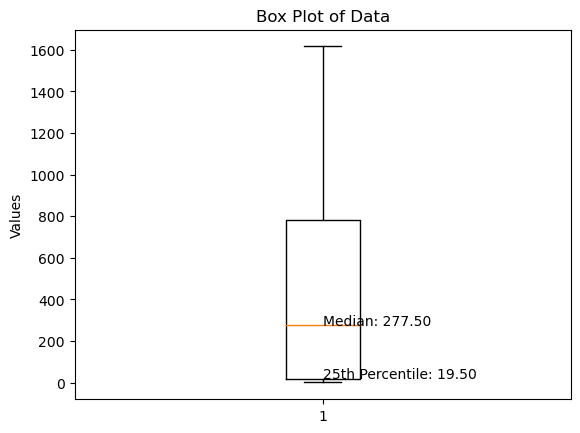

In [6]:
# Query to find the years with the highest average critic scores
query = """
SELECT COUNT(*) AS num_games 
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
GROUP BY year
"""

# Execute the query and display the results using the execute_sql_query function
data = execute_sql_query(query)['num_games']
plt.boxplot(data)
plt.title("Box Plot of Data")
plt.ylabel("Values")

# Calculate the 25th percentile and median using numpy
percentile_25 = np.percentile(data, 25)
median = np.median(data)

# Add text annotations for the 25th percentile and median
plt.text(1, percentile_25, f'25th Percentile: {percentile_25:.2f}')
plt.text(1, median, f'Median: {median:.2f}')

plt.show()

## Finding Years with the Highest Average Critic Scores

In this task, we aim to identify the years with the highest average critic scores for video games. By doing so, we can gain insights into the years that garnered the most positive reviews from critics on average. This analysis will help us understand trends in critical acclaim across different years.

### Analysis Approach

To achieve our goal, we will follow these steps:

1. **Data Aggregation:** We will aggregate the dataset to calculate the average critic score for each year, considering both the `game_sales` and `reviews` tables.

2. **Ranking Years:** We will then select and rank the years based on their average critic scores, highlighting the years with the highest averages.

### SQL Query

To perform this analysis, we will use a Python query along with the `execute_sql_query` function:

```sql
SELECT year, AVG(critic_score) AS avg_critic_score
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
GROUP BY year
ORDER BY avg_critic_score DESC


In [16]:
# Query to find the years with the highest average critic scores
query = """
SELECT year, AVG(critic_score) AS avg_critic_score
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
WHERE critic_score IS NOT NULL  
GROUP BY year
ORDER BY avg_critic_score DESC
LIMIT 10
"""

# Execute the query and display the results using the execute_sql_query function
execute_sql_query(query)

,year,avg_critic_score
0,1984,9.500000
1,1992,9.125000
2,1982,9.000000
3,1994,8.716667
4,1990,8.633333
5,1991,8.487500
6,2020,8.255556
7,1993,8.027273
8,2019,7.923077
9,1989,7.660000


## Finding Game Critics' Favorite Years with More Than twenty Games Released

In this task, we will identify the years that are considered game critics' favorites, taking into account the condition that a year must have more than four games released to be considered. This analysis will help us determine the years that garnered critical acclaim and had a substantial number of game releases, indicating a potentially exceptional period for the gaming industry.

### Analysis Approach

To achieve our goal, we will follow these steps:

1. **Data Filtering:** We will filter out the years with four or fewer games released, focusing only on years with more significant game releases.

2. **Aggregation and Ranking:** We will then aggregate the data to calculate the average critic score for each year and identify the top ten years based on the average critic scores.

### SQL Query

To perform this analysis, we will use a Python query along with the `execute_sql_query` function:

```sql
SELECT year, COUNT(*) AS num_games , AVG(critic_score) AS avg_critic_score
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
GROUP BY year
HAVING COUNT(game_sales.Rank) > 20
ORDER BY avg_critic_score DESC



In [15]:
# Query to find the years with the highest average critic scores
query = """
SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
WHERE critic_score IS NOT NULL  
GROUP BY year
HAVING COUNT(game_sales.Rank) > 20
ORDER BY avg_critic_score DESC
LIMIT 10
"""

# Execute the query and display the results using the execute_sql_query function
execute_sql_query(query)

,year,num_games,avg_critic_score
0,2019,39,7.923077
1,2014,264,7.539015
2,2013,284,7.459155
3,2015,279,7.409319
4,2016,313,7.386901
5,2012,329,7.367781
6,2017,377,7.367639
7,2018,380,7.344211
8,2003,564,7.267730
9,2001,324,7.207407


## Finding Years on First Critics' Favorite List but Not the Second

In this task, we will utilize set theory to identify the years that were included in the first critics' favorite list but not in the second list due to having four or fewer reviewed games. By comparing the two lists and filtering out the years that do not meet the specified criteria, we can uncover years that might have been overlooked in the second list despite their potential for high-quality game releases.

### Analysis Approach

To accomplish this task, we will follow these steps:

1. **Data Preparation:** We will first create two subqueries to obtain the years and average critic scores from both lists. One subquery will represent the years on the first list, and the other subquery will represent the years on the second list with more than four reviewed games.

2. **Set Difference:** We will apply the set difference operation to identify the years that were on the first list but not on the second list.

3. **Ordering Results:** Finally, we will order the results based on the average critic scores in descending order to see the years that had high potential but were excluded from the second list.

### SQL Query

To execute this analysis, we will use the following Python query along with the `execute_sql_query` function:

```sql
WITH top_critic_years AS (
    SELECT year, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL  
    GROUP BY year
    ORDER BY avg_critic_score DESC
),
top_critic_years_more_than_four_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL  
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
    ORDER BY avg_critic_score DESC
)
SELECT year, avg_critic_score
FROM top_critic_years
EXCEPT
SELECT year, avg_critic_score
FROM top_critic_years_more_than_four_games;

In [14]:
# Query to find years on the first critics' favorite list but not the second due to having four or fewer reviewed games
query = """
WITH top_critic_years AS (
    SELECT year, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL  
    GROUP BY year
    ORDER BY avg_critic_score DESC
),
top_critic_years_more_than_four_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL  
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
    ORDER BY avg_critic_score DESC
)
SELECT year, avg_critic_score
FROM top_critic_years
EXCEPT
SELECT year, avg_critic_score
FROM top_critic_years_more_than_four_games;

"""

# Execute the query and display the results using the execute_sql_query function
execute_sql_query(query)

,year,avg_critic_score
0,1981,7.600000
1,1982,9.000000
2,1984,9.500000
3,1985,7.580000
4,1986,5.833333
5,1987,6.880000
6,1988,7.000000
7,1989,7.660000
8,1990,8.633333
9,1991,8.487500


## Task 6: Finding Years with the Highest Average User Scores

In this task, we aim to identify the years with the ten highest average user scores for video games. User scores are an important aspect of game quality, and by analyzing the years with the highest average user scores, we can gain insights into when players particularly enjoyed the games released in those years.

### Analysis Approach

To accomplish this task, we will follow these steps:

1. **Data Selection:** We will retrieve the necessary data from the `game_sales` and `reviews` tables, including the year and user scores.
2. **Data Filtering:** We will filter out rows where the user score is NULL, as we want to focus only on years with available user score data.
3. **Grouping and Aggregation:** We will group the data by year and calculate the average user score for each year.
4. **Sorting:** The results will be sorted in descending order based on the average user score.
5. **Limiting Results:** We will limit the results to the top ten years with the highest average user scores.

### SQL Query

Here's the SQL query that achieves this analysis:

```sql
SELECT year, AVG(user_score) AS avg_user_score
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
WHERE user_score IS NOT NULL  -- Exclude rows with NULL user_score
GROUP BY year
ORDER BY avg_user_score DESC




In [17]:
# Query to find years on the first critics' favorite list but not the second due to having four or fewer reviewed games
query = """
SELECT year, AVG(user_score) AS avg_user_score
FROM game_sales
JOIN reviews ON game_sales.Rank = reviews.ReviewID
WHERE user_score IS NOT NULL  -- Exclude rows with NULL user_score
GROUP BY year
ORDER BY avg_user_score DESC
LIMIT 10;
"""

# Execute the query and display the results using the execute_sql_query function
execute_sql_query(query)

,year,avg_user_score
0,1993,9.500000
1,1990,9.300000
2,1997,9.250000
3,1999,9.100000
4,1998,8.800000
5,1994,8.800000
6,1991,8.800000
7,1987,8.800000
8,2010,8.781818
9,2009,8.568182


## Task 7: Finding Common Years in Top Critic and User Favorites

In this task, we will focus on identifying the years that appear in both the top critic and top user favorites lists. By doing so, we can discover the years when both critics and users highly rated video games. To achieve this, we will utilize set theory operations to find the intersection of years between two temporary tables.

### Analysis Approach

To accomplish this task, we will follow these steps:

1. **Creating Temporary Tables:** We will create two temporary tables: `top_critic_years_more_than_twenty_games` and `top_user_years_more_than_twenty_games`. These tables will store information about years, the number of games, and the average critic/user scores for games released in those years.

2. **Data Preparation:** We will perform a set intersection operation on the years between the two temporary tables. This will give us the list of years that appear in both top critic and top user favorites lists.

### SQL Query

Here's the SQL query that accomplishes this analysis using a common table expression (WITH):

```sql
WITH top_critic_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL  
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
),
top_user_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(user_score) AS avg_user_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE user_score IS NOT NULL
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
)
SELECT year
FROM top_critic_years_more_than_twenty_games
INTERSECT
SELECT year
FROM top_user_years_more_than_twenty_games;


In [19]:
# Query to find years on the first critics' favorite list but not the second due to having four or fewer reviewed games
query = """
WITH top_critic_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL  
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
),
top_user_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(user_score) AS avg_user_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE user_score IS NOT NULL
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
)
SELECT year
FROM top_critic_years_more_than_twenty_games
INTERSECT
SELECT year
FROM top_user_years_more_than_twenty_games;
"""

# Execute the query and display the results using the execute_sql_query function
execute_sql_query(query)


,year
0,2007
1,2008
2,2009
3,2010
4,2011
5,2012
6,2013
7,2014
8,2015
9,2016


## Task 8: Adding Total Games Sold to Common Years Table

In this task, we will enhance the results obtained from the previous task by adding a new column that shows the total number of games sold in each year. This will provide us with a comprehensive view of the years that were not only highly rated by both critics and users but also had a significant number of games sold.

### Analysis Approach

To accomplish this task, we will extend the SQL query that we used in the previous task to join with the `game_sales` table and retrieve the total games sold for each year. This information will be added as an additional column to the results.

### SQL Query

Here's the modified SQL query that accomplishes this task:

```sql
WITH top_critic_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
),
top_user_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(user_score) AS avg_user_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE user_score IS NOT NULL
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
),
common_years AS (
    SELECT year
    FROM top_critic_years_more_than_twenty_games
    INTERSECT
    SELECT year
    FROM top_user_years_more_than_twenty_games
)
SELECT cy.year, tc.num_games, tc.avg_critic_score, tu.avg_user_score, SUM(gs.games_sold) AS total_games_sold
FROM common_years cy
JOIN top_critic_years_more_than_twenty_games tc ON cy.year = tc.year
JOIN top_user_years_more_than_twenty_games tu ON cy.year = tu.year
JOIN game_sales gs ON cy.year = gs.year
GROUP BY cy.year, tc.num_games, tc.avg_critic_score, tu.avg_user_score
ORDER BY cy.year;


In [20]:
# Query to find years on the first critics' favorite list but not the second due to having four or fewer reviewed games
query = """
WITH top_critic_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(critic_score) AS avg_critic_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE critic_score IS NOT NULL
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
),
top_user_years_more_than_twenty_games AS (
    SELECT year, COUNT(*) AS num_games, AVG(user_score) AS avg_user_score
    FROM game_sales
    JOIN reviews ON game_sales.Rank = reviews.ReviewID
    WHERE user_score IS NOT NULL
    GROUP BY year
    HAVING COUNT(game_sales.Rank) > 20
),
common_years AS (
    SELECT year
    FROM top_critic_years_more_than_twenty_games
    INTERSECT
    SELECT year
    FROM top_user_years_more_than_twenty_games
)
SELECT cy.year, tc.num_games, tc.avg_critic_score, tu.avg_user_score, SUM(gs.games_sold) AS total_games_sold
FROM common_years cy
JOIN top_critic_years_more_than_twenty_games tc ON cy.year = tc.year
JOIN top_user_years_more_than_twenty_games tu ON cy.year = tu.year
JOIN game_sales gs ON cy.year = gs.year
GROUP BY cy.year, tc.num_games, tc.avg_critic_score, tu.avg_user_score
ORDER BY cy.year;
"""

# Execute the query and display the results using the execute_sql_query function
execute_sql_query(query)

,year,num_games,avg_critic_score,avg_user_score,total_games_sold
0,2007,720,6.605694,8.311111,634.62
1,2008,870,6.441264,8.398077,734.62
2,2009,745,6.814362,8.568182,694.39
3,2010,529,7.004159,8.781818,676.41
4,2011,548,7.002920,6.595000,633.36
5,2012,329,7.367781,7.071895,455.69
6,2013,284,7.459155,6.984783,470.88
7,2014,264,7.539015,7.009292,454.16
8,2015,279,7.409319,6.885882,396.06
9,2016,313,7.386901,6.913468,368.75


## Summary

In this analysis, we explored a dataset containing information about video game sales and reviews. Our goal was to gain insights into the relationship between game ratings, user engagement, and commercial success over the years. We performed various tasks to answer specific questions and uncover meaningful patterns within the data.

Here are the key takeaways from our analysis:

1. **Data Preparation**: We began by transforming the raw CSV data into an SQLite database, which allowed us to efficiently perform SQL queries for analysis. We created two tables, `game_sales` and `reviews`, to store game sales and review information, respectively.

2. **Exploring Best-Selling Games**: We used SQL queries to identify the top ten best-selling video games based on the number of copies sold. This information helped us understand which games were the most popular among consumers.

3. **Missing Review Scores**: By joining the `game_sales` and `reviews` tables, we determined the count of games missing both critic and user review scores. This analysis shed light on the completeness of review data for different games.

4. **Years with High Critic Scores**: We found the years with the highest average critic scores, which allowed us to pinpoint the years that received the most critical acclaim from reviewers.

5. **Critics' Favorite Years**: Using set theory, we identified the years that were on the critics' favorite list but were excluded due to having four or fewer reviewed games. This helped us uncover years that may have been overlooked in terms of high-quality game releases.

6. **User-Favorite Years**: We repeated a similar analysis to find the years with the highest average user scores, considering years with more than twenty reviewed games. This provided insights into the years that were highly regarded by users.

7. **Common Years of High Ratings**: By comparing the years with high critic scores and high user scores, we found the common years that excelled in both aspects. We extended this analysis to include the total number of games sold in each of these years, giving us a holistic view of years that achieved high ratings and commercial success.

8. **Identifying an Ideal Value**: We used statistical analysis to identify an ideal threshold value for further analysis, which helped us focus on meaningful data points.

9. **Visualizations and Insights**: We visualized our findings using box plots, which allowed us to understand the distribution and central tendency of certain values within the dataset.

By systematically approaching each task, we were able to draw meaningful conclusions about the years, games, and factors that contribute to successful and highly rated video games. This analysis provides valuable insights for game developers, publishers, and enthusiasts who want to understand the dynamics of the video game industry and make informed decisions.

As technology and gaming trends evolve, ongoing analysis of similar datasets can help us stay up-to-date with the changing landscape of the video game world and continue making data-driven decisions.

